## Importing Necessary libraries

In [41]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn


In [42]:
import os
os.getcwd()

'd:\\material\\Machine_Deep\\github_repos\\AI\\ML\\EDA'

## Dataset

In [43]:
data = pd.read_csv("data/adult.csv")
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [44]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [45]:
print(f"The null values count :")
print((data == "?").sum())
print(f"the total no of samples are -> {len(data)}")

The null values count :
age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64
the total no of samples are -> 48842


## Handling missing values for the workclass column

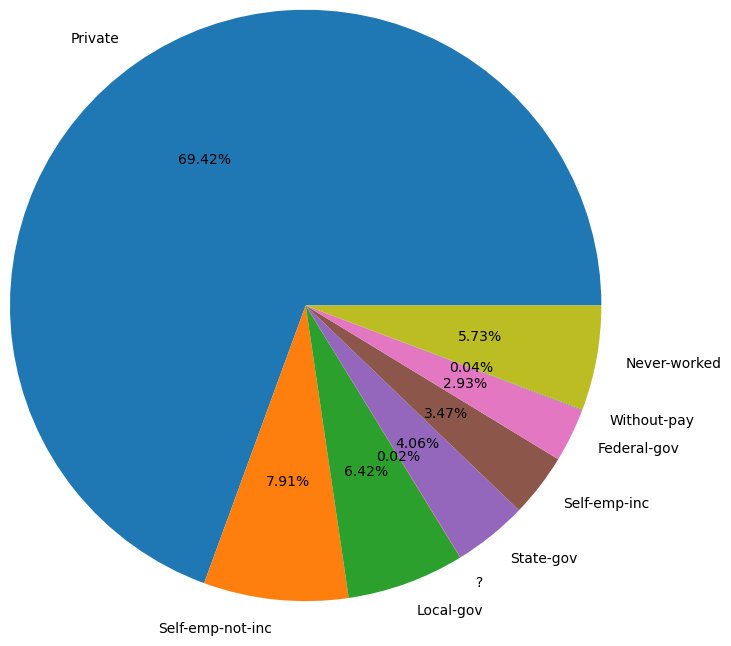

<Figure size 700x500 with 0 Axes>

In [46]:
df1 = data['workclass'].value_counts()
labels = df1.index
numbers = df1.values
df1[-1], df1[3] = df1[3], df1[-1]

fig, ax = plt.subplots()
plt.figure(figsize=(7, 5))
ax.pie(numbers, labels=labels, labeldistance=1.1, radius=2, autopct='%1.2f%%');

In [47]:
new_data = pd.get_dummies(data=data, prefix="ww", columns=["workclass"])
workclass_dist = [col for col in new_data.columns if col[:2]=="ww"]

In [48]:
(new_data["ww_?"] > 0).sum()

2799

['ww_?',
 'ww_Federal-gov',
 'ww_Local-gov',
 'ww_Never-worked',
 'ww_Private',
 'ww_Self-emp-inc',
 'ww_Self-emp-not-inc',
 'ww_State-gov',
 'ww_Without-pay']

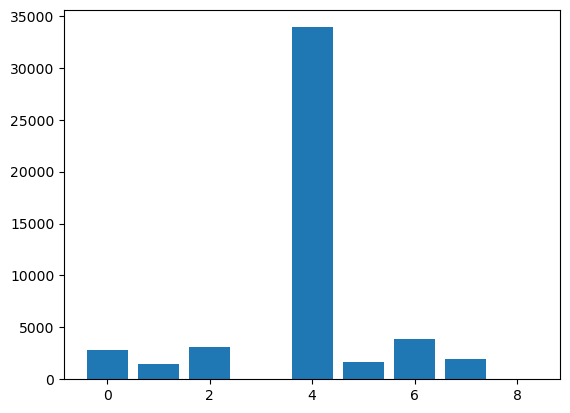

In [49]:
fig, axs = plt.subplots()
axs.bar(x=np.arange(len(workclass_dist)), height=[(new_data[col] == 1).sum() for col in workclass_dist],);
workclass_dist

## The portion of missing values is not too big, it's ~0.02%
### So I will just put these peoples in Private sector cause it's portion is ~70%

In [50]:
data["workclass"] = data["workclass"].replace('?', "Private")

In [51]:
data = data.replace('?', np.nan)

In [52]:
print(f"The null values count :")
print(data.isnull().sum())
print(f"the total no of samples are -> {len(data)}")

The null values count :
age                   0
workclass             0
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64
the total no of samples are -> 48842


## Handling missing values for occupation

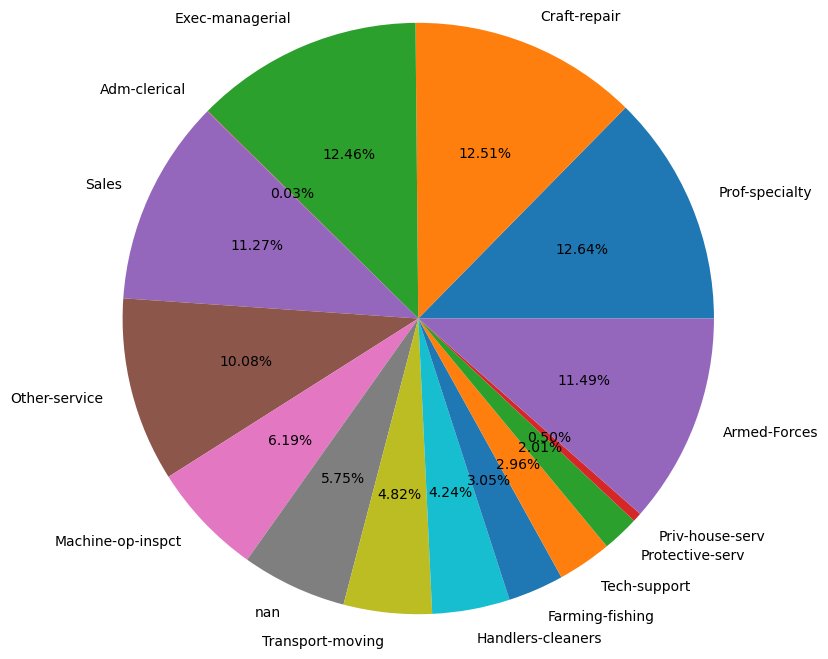

<Figure size 700x500 with 0 Axes>

In [53]:
# by default nan are exclued in value_counts
df1 = data['occupation'].value_counts(dropna=False)
labels = df1.index
numbers = df1.values
df1[-1], df1[3] = df1[3], df1[-1]

fig, ax = plt.subplots()
plt.figure(figsize=(7, 5))
ax.pie(numbers, labels=labels, labeldistance=1.1, radius=2, autopct='%1.2f%%');

['ww_Adm-clerical',
 'ww_Armed-Forces',
 'ww_Craft-repair',
 'ww_Exec-managerial',
 'ww_Farming-fishing',
 'ww_Handlers-cleaners',
 'ww_Machine-op-inspct',
 'ww_Other-service',
 'ww_Priv-house-serv',
 'ww_Prof-specialty',
 'ww_Protective-serv',
 'ww_Sales',
 'ww_Tech-support',
 'ww_Transport-moving',
 'ww_nan']

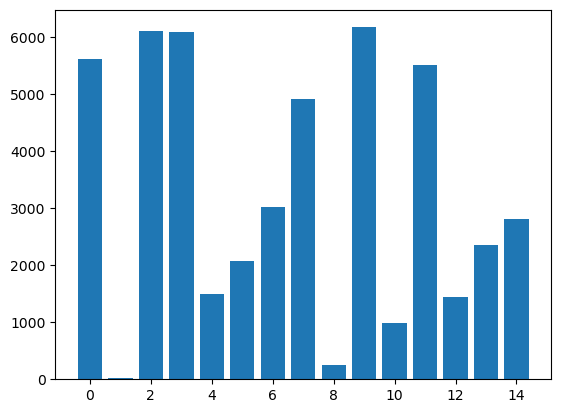

In [54]:
new_data = pd.get_dummies(data=data, prefix="ww", columns=["occupation"], dummy_na=True)
workclass_dist = [col for col in new_data.columns if col[:2]=="ww"]

fig, axs = plt.subplots()
axs.bar(x=np.arange(len(workclass_dist)), height=[(new_data[col] == 1).sum() for col in workclass_dist],);
workclass_dist

## As the Nan value consits of ~5.75% of data, we can't just ignore/ fill these using random values

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')


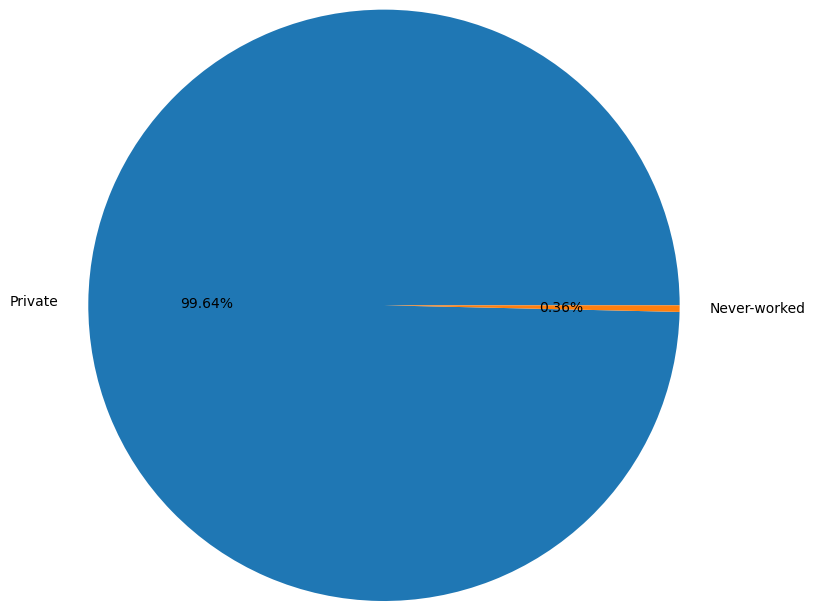

<Figure size 700x500 with 0 Axes>

In [81]:
print(data.columns)
df1 = data[data["occupation"].isna()]["workclass"]
df1 = df1.value_counts()
# data["occupation"]

labels = df1.index
numbers = df1.values

fig, ax = plt.subplots()
plt.figure(figsize=(7, 5))
ax.pie(numbers, labels=labels, labeldistance=1.1, radius=2, autopct='%1.2f%%');

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')


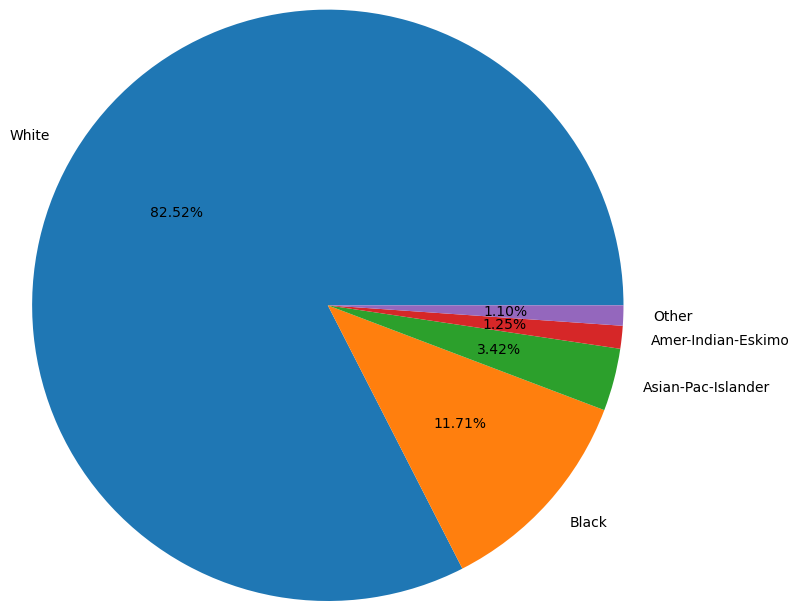

<Figure size 700x500 with 0 Axes>

In [102]:
print(data.columns)
df1 = data[data["occupation"].isna()]["race"]
df1 = df1.value_counts()
# data["occupation"]

labels = df1.index
numbers = df1.values

fig, ax = plt.subplots()
plt.figure(figsize=(7, 5))
ax.pie(numbers, labels=labels, labeldistance=1.1, radius=2, autopct='%1.2f%%');

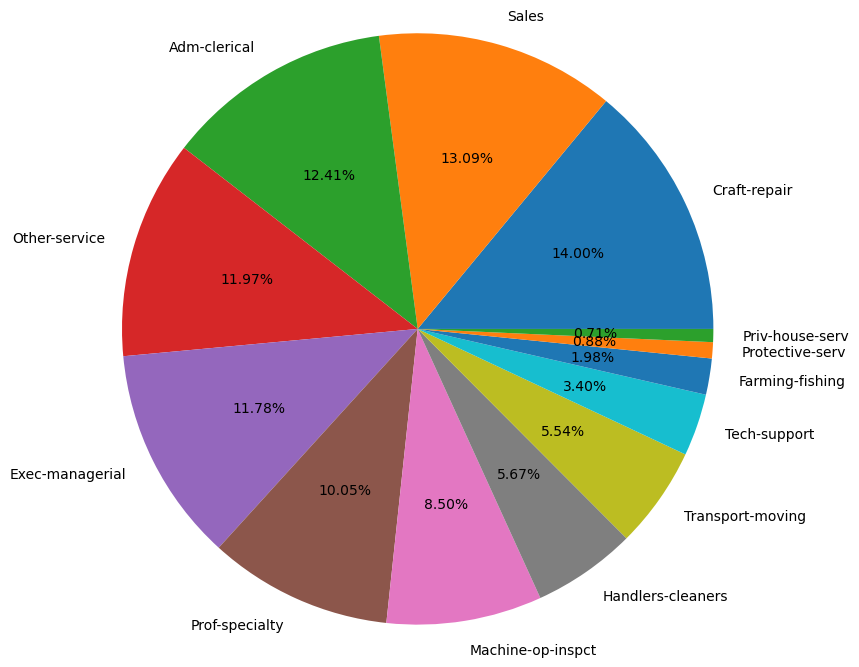

<Figure size 700x500 with 0 Axes>

In [104]:
df1 = data[(data["occupation"].notnull()) &( data["workclass"] == "Private")]["occupation"]
df1 = df1.value_counts()

labels = df1.index
numbers = df1.values

fig, ax = plt.subplots()
plt.figure(figsize=(7, 5))
ax.pie(numbers, labels=labels, labeldistance=1.1, radius=2, autopct='%1.2f%%');

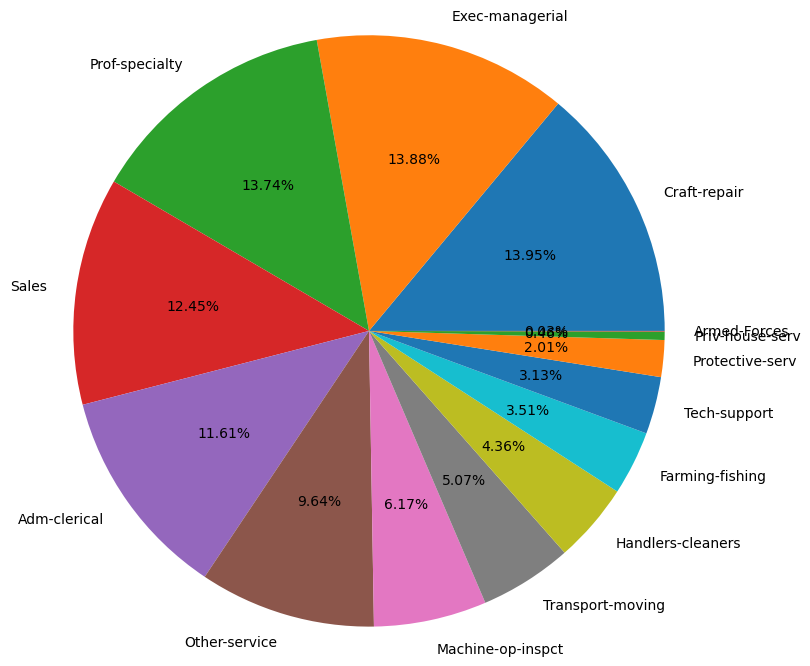

<Figure size 700x500 with 0 Axes>

In [105]:
df1 = data[(data["occupation"].notnull()) &( data["race"] == "White")]["occupation"]
df1 = df1.value_counts()

labels = df1.index
numbers = df1.values

fig, ax = plt.subplots()
plt.figure(figsize=(7, 5))
ax.pie(numbers, labels=labels, labeldistance=1.1, radius=2, autopct='%1.2f%%');

### After analysing above plots I will fill the na values with Craft-repair

In [108]:
data["occupation"].fillna("Craft-repair", inplace=True)
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,Private,103497,Some-college,10,Never-married,Craft-repair,Own-child,White,Female,0,0,30,United-States,<=50K


In [109]:
print(f"The null values count :")
print(data.isnull().sum())
print(f"the total no of samples are -> {len(data)}")

The null values count :
age                  0
workclass            0
fnlwgt               0
education            0
educational-num      0
marital-status       0
occupation           0
relationship         0
race                 0
gender               0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
income               0
dtype: int64
the total no of samples are -> 48842


## Handling missing values from naitive-country

(Index([             'United-States',                     'Mexico',
                                 nan,                'Philippines',
                           'Germany',                'Puerto-Rico',
                            'Canada',                'El-Salvador',
                             'India',                       'Cuba',
                           'England',                      'China',
                             'South',                    'Jamaica',
                             'Italy',         'Dominican-Republic',
                             'Japan',                  'Guatemala',
                            'Poland',                    'Vietnam',
                          'Columbia',                      'Haiti',
                          'Portugal',                     'Taiwan',
                              'Iran',                     'Greece',
                         'Nicaragua',                       'Peru',
                           'Ecuador',           

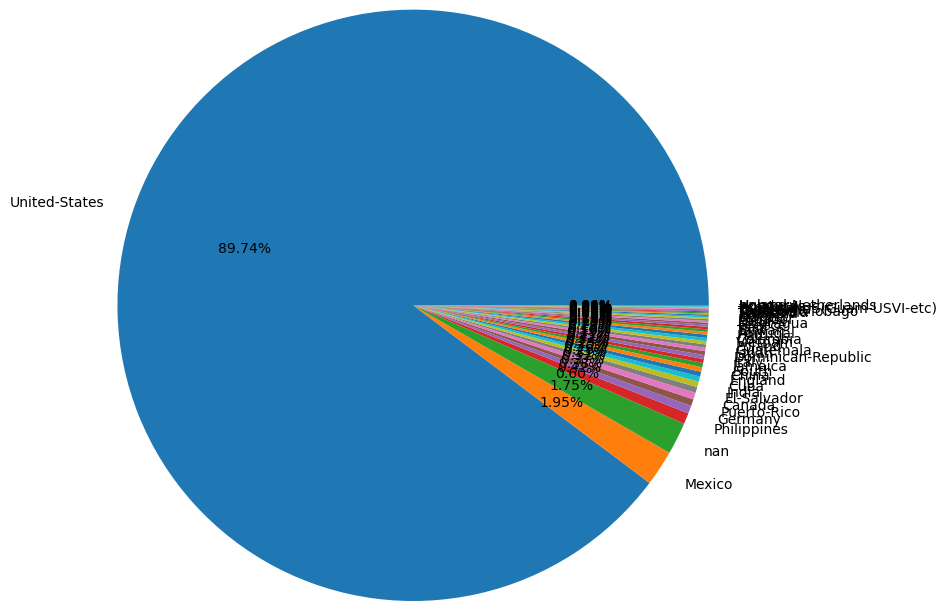

<Figure size 700x500 with 0 Axes>

In [115]:
df1 = data["native-country"]
df1 = df1.value_counts(dropna=False)
# data["occupation"]

labels = df1.index
numbers = df1.values

fig, ax = plt.subplots()
plt.figure(figsize=(7, 5))
ax.pie(numbers, labels=labels, labeldistance=1.1, radius=2, autopct='%1.2f%%');
labels, numbers

### nan ~1.75% 

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')


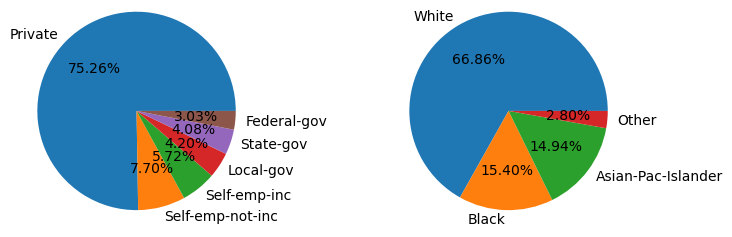

<Figure size 700x500 with 0 Axes>

In [132]:
print(data.columns)
df1 = data[data["native-country"].isna()]["workclass"]
df1 = df1.value_counts()
# data["occupation"]

labels0 = df1.index
numbers0 = df1.values

df1 = data[data["native-country"].isna()]["race"]
df1 = df1.value_counts()
# data["occupation"]

labels1 = df1.index
numbers1 = df1.values


fig, ax = plt.subplots(nrows=1, ncols=2)
plt.subplots_adjust(wspace=2)
plt.figure(figsize=(7, 5))
ax[0].pie(numbers0, labels=labels0, labeldistance=1.1, radius=2, autopct='%1.2f%%');
ax[1].pie(numbers1, labels=labels1, labeldistance=1.1, radius=2, autopct='%1.2f%%');

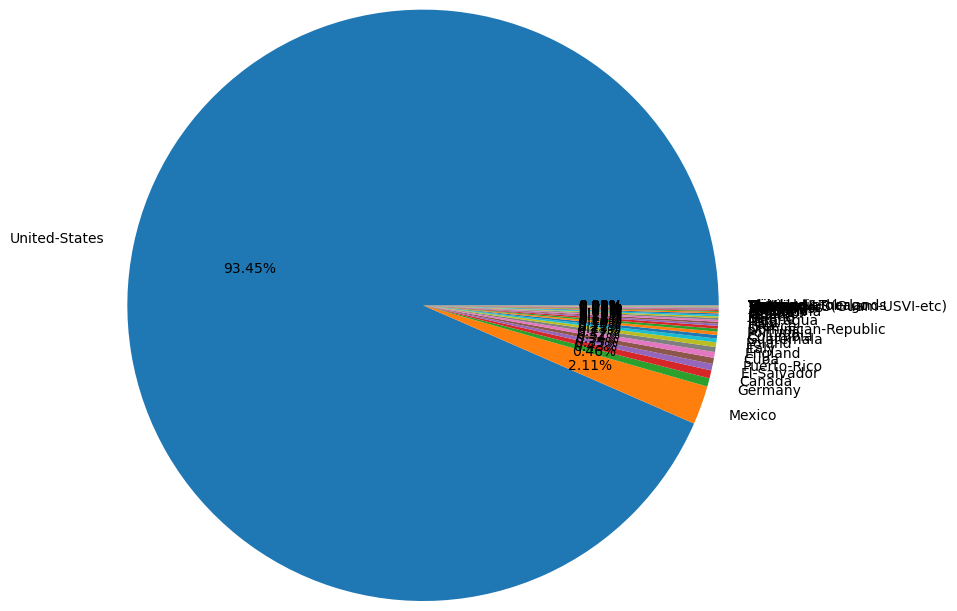

<Figure size 700x500 with 0 Axes>

In [134]:
df1 = data[(data["native-country"].notnull()) &( data["race"] == "White")]["native-country"]
df1 = df1.value_counts()

labels = df1.index
numbers = df1.values

fig, ax = plt.subplots()
plt.figure(figsize=(7, 5))
ax.pie(numbers, labels=labels, labeldistance=1.1, radius=2, autopct='%1.2f%%');

# SO We will simply replace na values with United-States here

In [136]:
data["native-country"].fillna("United-States", inplace=True)

In [137]:
print(f"The null values count :")
print(data.isnull().sum())
print(f"the total no of samples are -> {len(data)}")

The null values count :
age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64
the total no of samples are -> 48842


## THIS IPYNB FILE IS GOING TOO LONG SO CONTINUING IN OTHER FILE

In [141]:
data.to_csv("data/adults_missing_values_done.csv", index=False)